## Lab: Visualizing and Analyzing Time Series Data

Welcome to the lab session for **Visualizing and Analyzing Time Series Data**. In this session, you will learn how to visualize and analyze time series data.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Basic Time Series Data Visualization Techniques

**Line Plot**

In [2]:
# Load example dataset
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


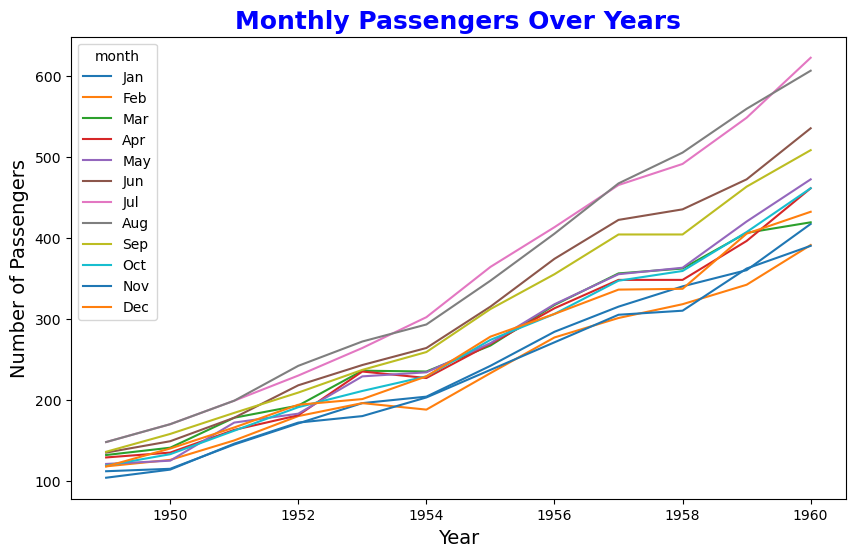

In [3]:
plt.figure(figsize=(10,6))
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='tab10')
plt.title("Monthly Passengers Over Years", fontsize=18, fontweight='bold', color='blue')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Passengers", fontsize=14)
plt.show()

**2nd Example of Line Plot**

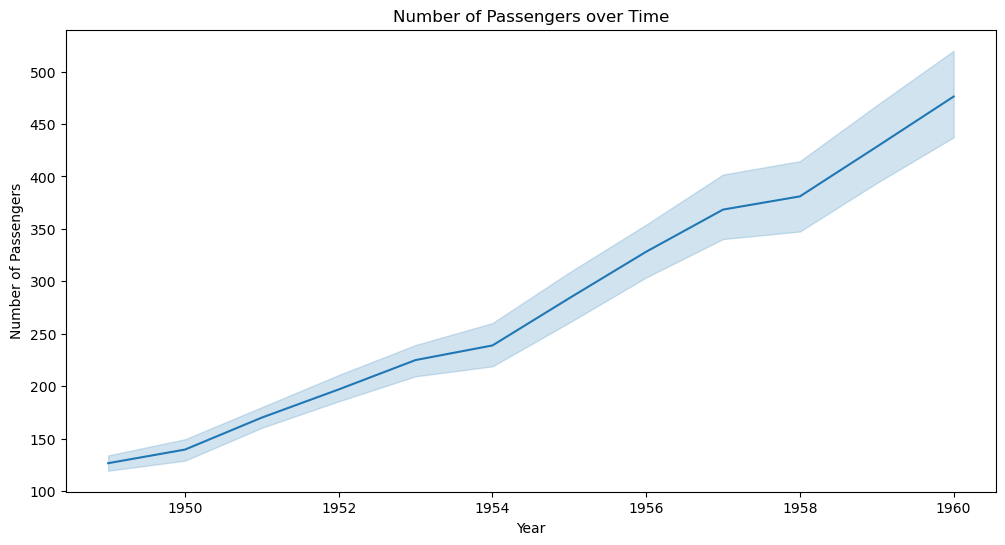

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=flights, x="year", y="passengers")
plt.title("Number of Passengers over Time")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

**Bar Chart**

In [5]:
# Load example dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


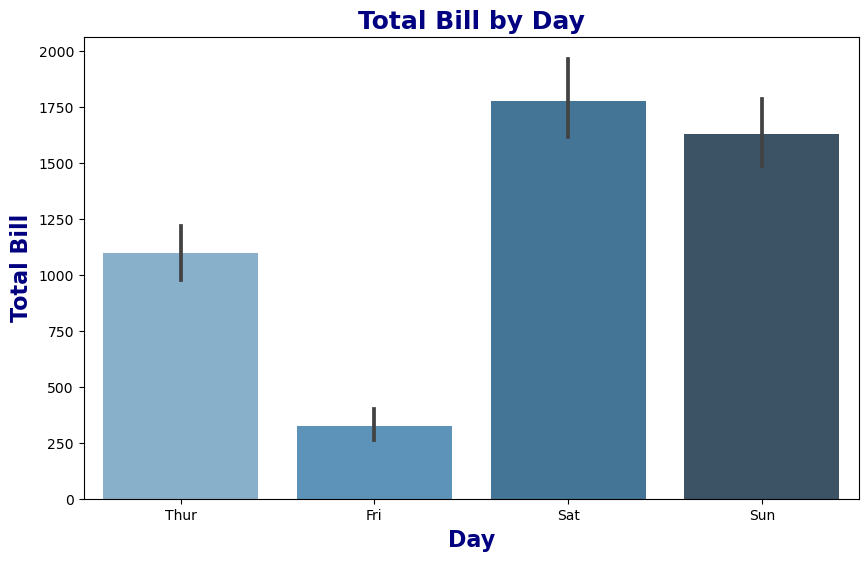

In [6]:
# Plotting a bar chart of total bill across different days
plt.figure(figsize=(10,6))
sns.barplot(data=tips, x='day', y='total_bill', estimator=sum, palette='Blues_d')
plt.title("Total Bill by Day", fontweight='bold', fontsize=18, color='navy')
plt.xlabel("Day", fontweight='bold', fontsize=16, color='navy')
plt.ylabel("Total Bill", fontweight='bold', fontsize=16, color='navy')
plt.show()

**Bar chart for Total Passenger Per Year**

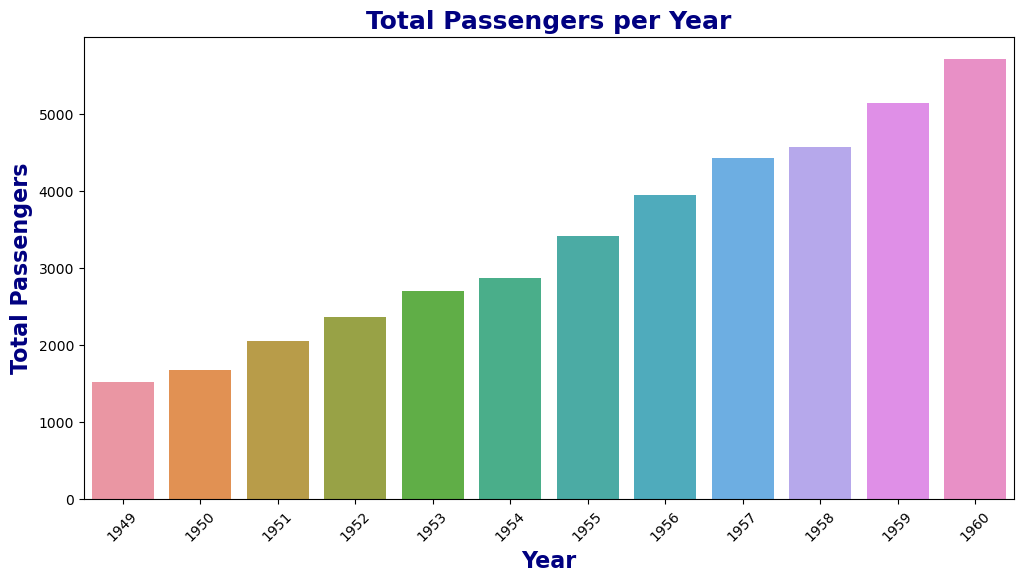

In [7]:
yearly_passengers = flights.groupby("year")["passengers"].sum().reset_index()  # aggregates total number of passengers for each year in the flights
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_passengers, x="year", y="passengers")
plt.title("Total Passengers per Year", fontweight='bold', fontsize=18, color='navy')
plt.xlabel("Year", fontweight='bold', fontsize=16, color='navy')
plt.ylabel("Total Passengers", fontweight='bold', fontsize=16, color='navy')
plt.xticks(rotation=45)
plt.show()

**Area Chart**

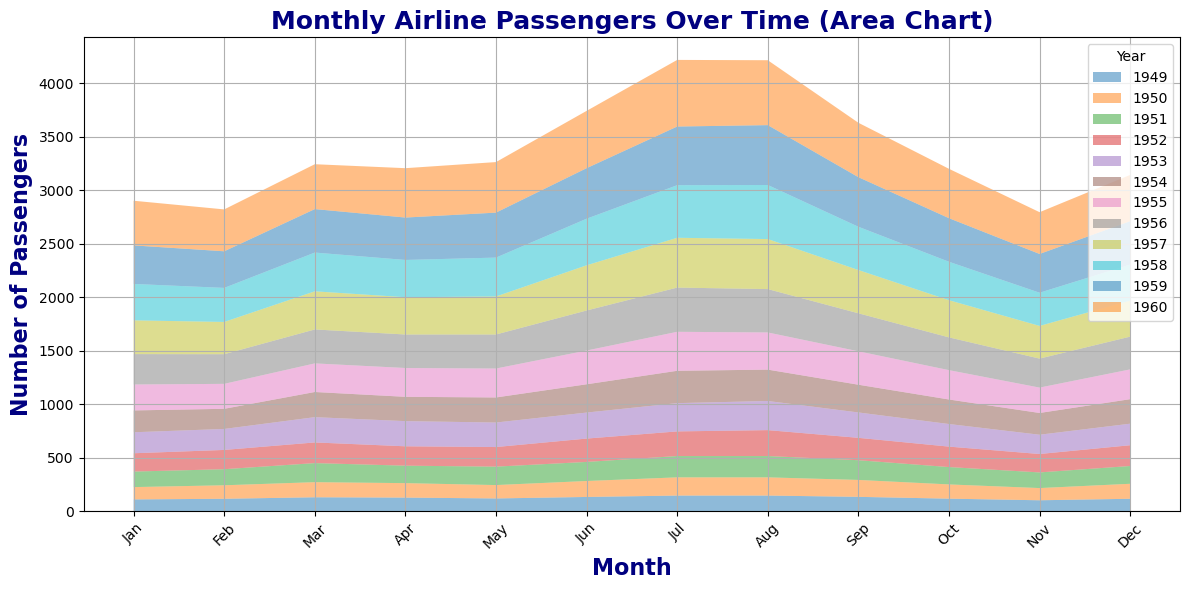

In [8]:
# Pivot the dataset to get a matrix of passengers per month and year
flights_pivot = flights.pivot_table(index='month', columns='year', values='passengers', fill_value=0)

plt.figure(figsize=(12, 6))
plt.stackplot(flights_pivot.index, flights_pivot.T, labels=flights_pivot.columns, alpha=0.5)
plt.title('Monthly Airline Passengers Over Time (Area Chart)', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Month', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('Number of Passengers', fontsize=16, fontweight='bold', color='navy')
plt.xticks(range(0, 12), flights['month'].unique(), rotation=45)
plt.legend(title='Year')
plt.grid()
plt.tight_layout()
plt.show()


**Stacked Area Chart**

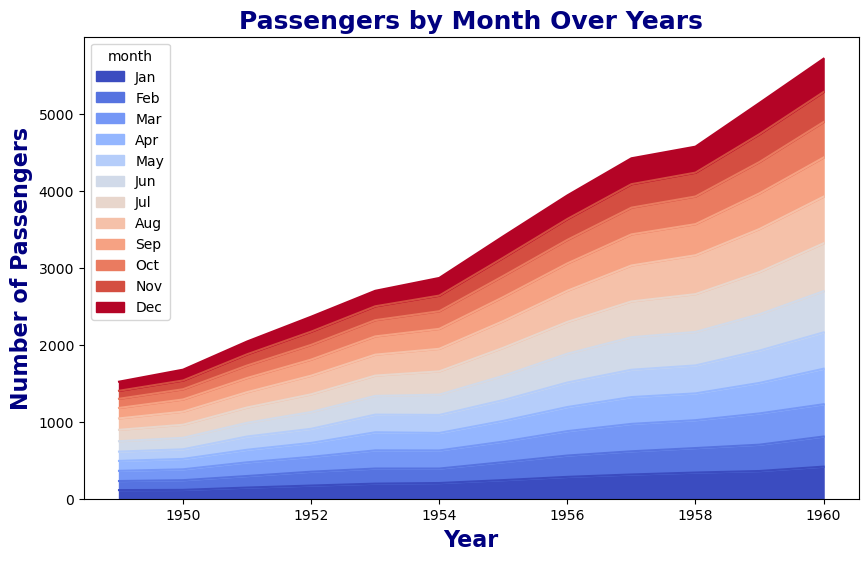

In [9]:
# Pivot the data to get a year-wise comparison of passengers for each month
flights_pivot = flights.pivot(index='year', columns='month', values='passengers')

# Plotting an area chart (stacked) for passengers
flights_pivot.plot(kind='area', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Passengers by Month Over Years", fontweight='bold', fontsize=18, color='navy')
plt.ylabel("Number of Passengers", fontweight='bold', fontsize=16, color='navy')
plt.xlabel("Year", fontweight='bold', fontsize=16, color='navy')
plt.show()

**Moving Averages & Smoothing**

In [10]:
# Load the dataset (Flights dataset in csv)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Plot the original data**

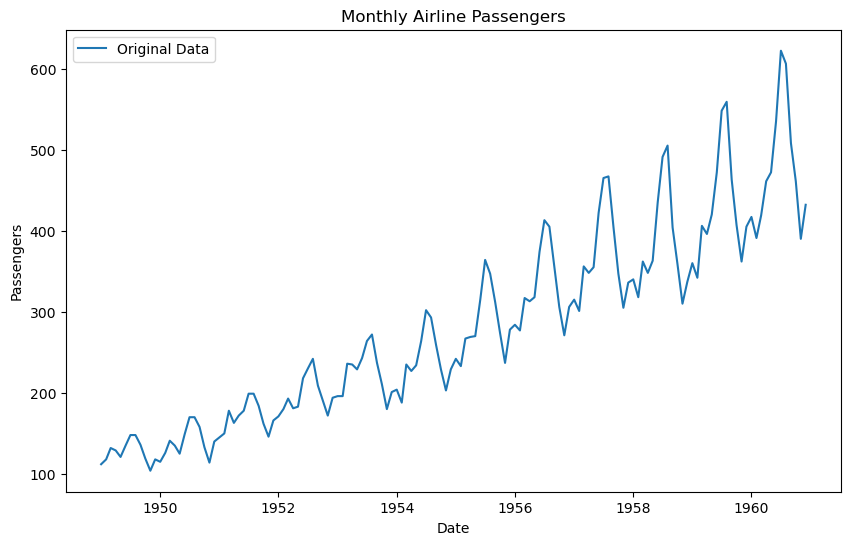

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df, label='Original Data')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

**Simple Moving Average & Exponential Moving Average**

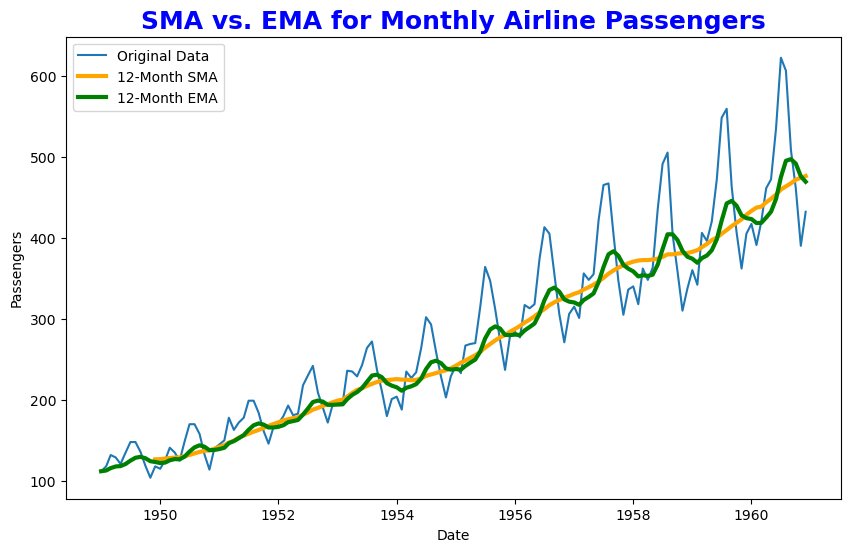

In [12]:
# Simple Moving Average (SMA) - 12 month window
df['SMA_12'] = df['Passengers'].rolling(window=12).mean()

# Exponential Moving Average (EMA) - 12 month span
df['EMA_12'] = df['Passengers'].ewm(span=12, adjust=False).mean()

plt.figure(figsize=(10,6))
plt.plot(df['Passengers'], label='Original Data')
plt.plot(df['SMA_12'], label='12-Month SMA', color='orange', linewidth=3)
plt.plot(df['EMA_12'], label='12-Month EMA', color='green', linewidth=3)
plt.title('SMA vs. EMA for Monthly Airline Passengers', fontweight='bold', fontsize=18, color='blue')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

---

### Advanced Time Series Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
np.random.seed(42)
# Generate sample data
dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
ts = pd.Series(np.cumsum(np.random.randn(len(dates))), index=dates)

print(len(ts))
print(ts.head)

1461
<bound method NDFrame.head of 2020-01-01     0.496714
2020-01-02     0.358450
2020-01-03     1.006138
2020-01-04     2.529168
2020-01-05     2.295015
                ...    
2023-12-27    63.573428
2023-12-28    63.954587
2023-12-29    65.244340
2023-12-30    65.917521
2023-12-31    65.779065
Freq: D, Length: 1461, dtype: float64>


#### **Trend Analysis**

**Linear Trend**

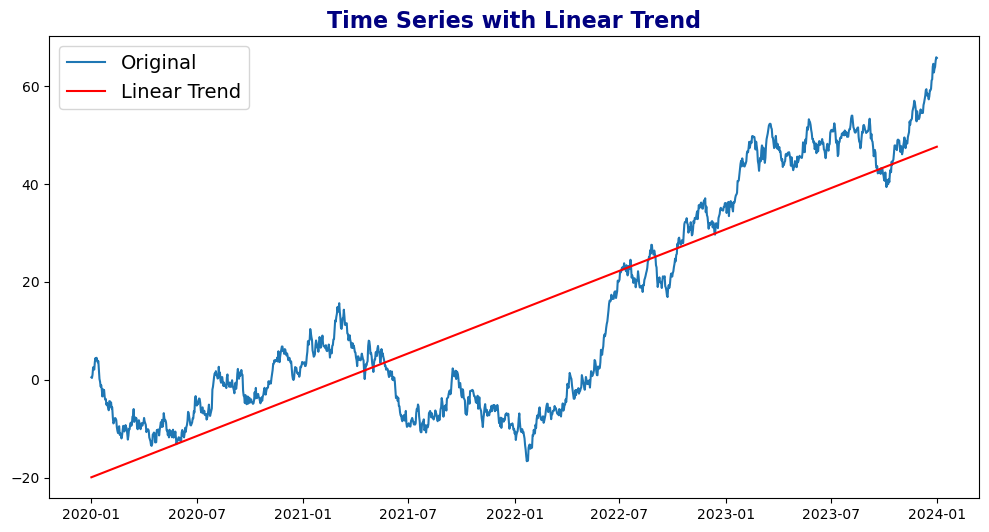

In [15]:
from sklearn.linear_model import LinearRegression
X = np.arange(len(ts)).reshape(-1, 1)
y = ts.values
model = LinearRegression().fit(X, y)
trend = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts.values, label='Original')
plt.plot(ts.index, trend, label='Linear Trend', color='red')
plt.legend(fontsize=14)
plt.title('Time Series with Linear Trend', fontsize=16, fontweight='bold', color='navy')
plt.show()

**Polynomial Trend**

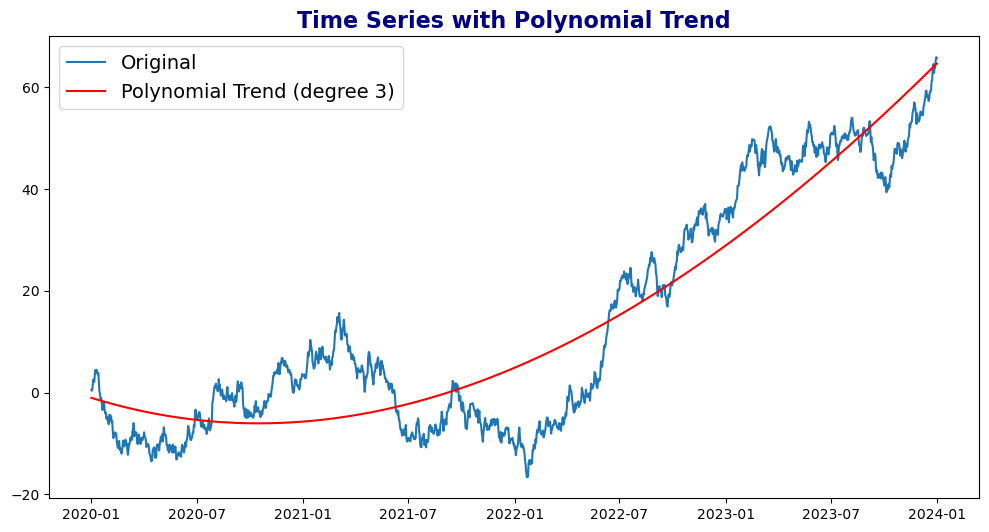

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial trend of degree 3
degree = 3
X = np.arange(len(ts)).reshape(-1, 1)
y = ts.values

# Create polynomial features
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, y)
trend_poly = model.predict(X_poly)

plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts.values, label='Original')
plt.plot(ts.index, trend_poly, label=f'Polynomial Trend (degree {degree})', color='red')
plt.legend(fontsize=14)
plt.title('Time Series with Polynomial Trend', fontsize=16, fontweight='bold', color='navy')
plt.show()


**Seasonal Decomposition**

In [17]:
from statsmodels.tsa.seasonal import STL

# Load example time series data
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', index_col='Month', parse_dates=True)
series = data['Passengers']

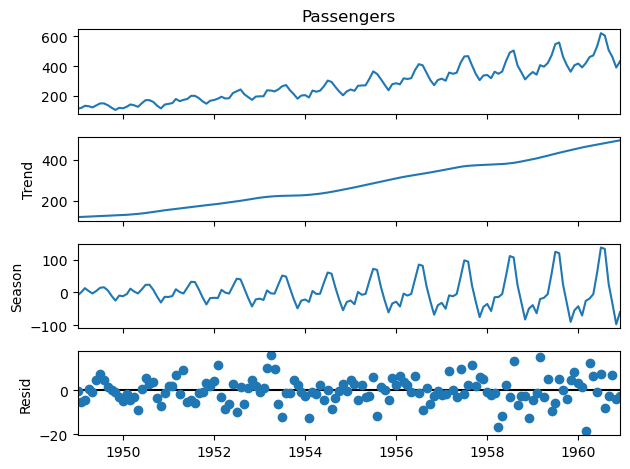

In [18]:
# Apply STL decomposition
stl = STL(series, seasonal=13)
result = stl.fit()

# Plot decomposition
result.plot()
plt.show()

**Stationarity and Differencing**

Original Series:
ADF Statistic: 0.6363643577159154
p-value: 0.9884784813992743
Critical Values:
	1%: -3.434836872962171
	5%: -2.863521656701378
	10%: -2.567825016419591

After First-Order Differencing:
ADF Statistic: -38.814446334391214
p-value: 0.0
Critical Values:
	1%: -3.4348399537053482
	5%: -2.8635230163107837
	10%: -2.5678257404326903


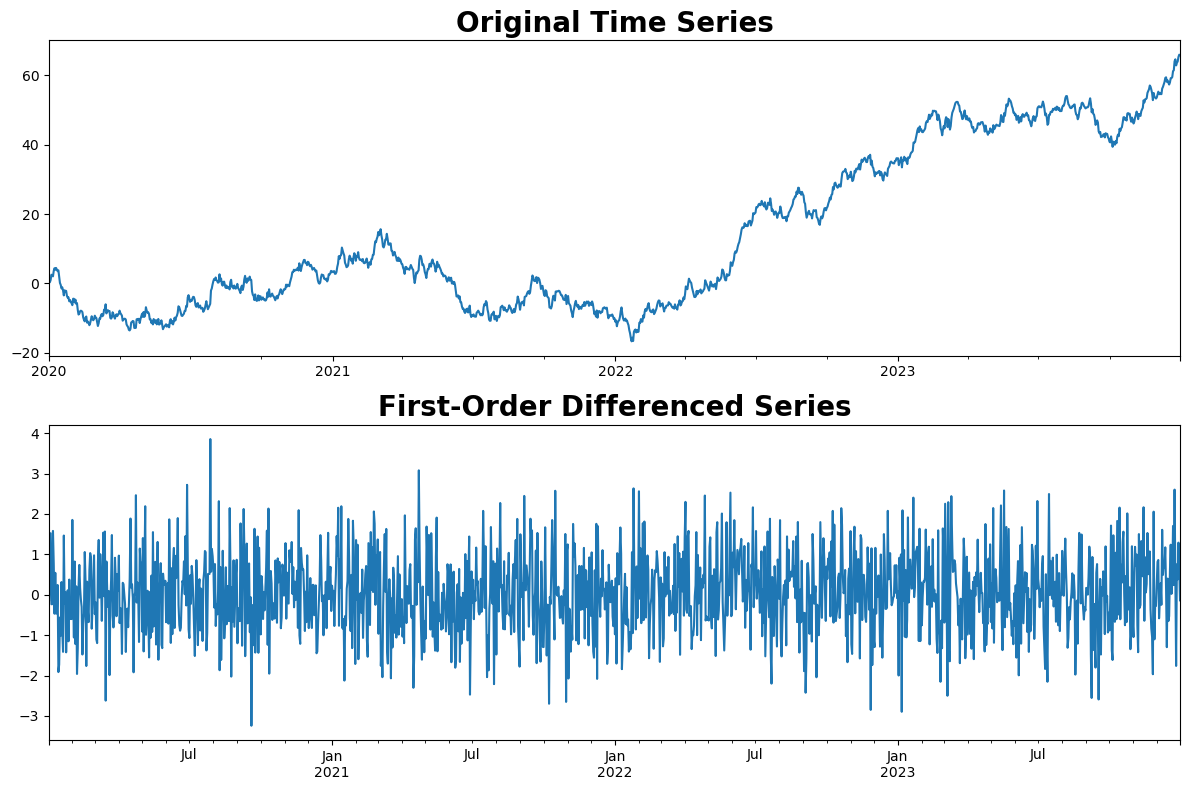

In [19]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Test original series
print("Original Series:")
test_stationarity(ts)

# First order differencing
ts_diff = ts.diff().dropna()
print("\nAfter First-Order Differencing:")
test_stationarity(ts_diff)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ts.plot(ax=ax1)
ax1.set_title('Original Time Series', fontweight='bold', fontsize=20)
ts_diff.plot(ax=ax2)
ax2.set_title('First-Order Differenced Series', fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

---